# Feature Engineering & Profit Calculation

In [30]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("food_orders_new_delhi (1).csv")

### Calculate discount values

In [32]:
def parse_discount(value):
    if isinstance(value, str):
        value = value.strip()
        if '%' in value:
            num_str = value.split('%')[0]
            try:
                return float(num_str) / 100
            except ValueError:
                return 0
        elif 'off' in value.lower():
            nums = [int(s) for s in value.split() if s.isdigit()]
            return nums[0] if nums else 0
    return 0

df['Discount Value'] = df['Discounts and Offers'].apply(parse_discount)
df['Discount Amount'] = df.apply(
    lambda row: row['Order Value'] * row['Discount Value'] if row['Discount Value'] < 1 else row['Discount Value'],
    axis=1
)

### Compute derived financial features

In [34]:
# Calculate Net Revenue, Costs, and Profit
df['Net Revenue'] = df['Order Value'] - df['Discount Amount'] + df['Delivery Fee']
df['Total Cost'] = df['Commission Fee'] + df['Payment Processing Fee'] + df['Refunds/Chargebacks']
df['Profit'] = df['Net Revenue'] - df['Total Cost']

# Show a preview of the calculations
df[['Order Value', 'Discount Amount', 'Net Revenue', 'Total Cost', 'Profit']].head()

,Order Value,Discount Amount,Net Revenue,Total Cost,Profit
0,1914,95.70,1818.30,197,1621.30
1,986,98.60,927.40,221,706.40
2,937,140.55,826.45,240,586.45
3,1463,0.00,1513.00,173,1340.00
4,1992,50.00,1972.00,180,1792.00


### Visualize Profit Distribution

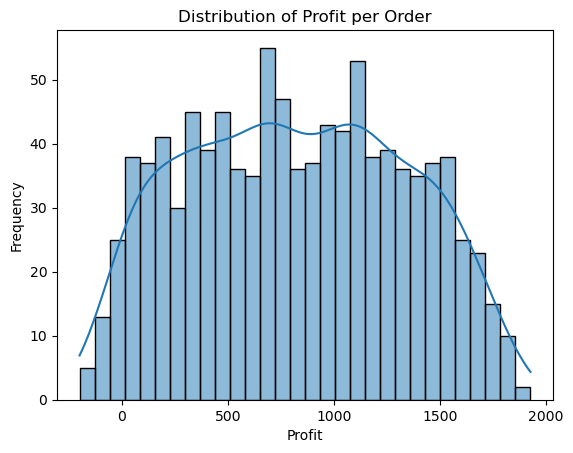

In [36]:
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title("Distribution of Profit per Order")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

### Discount vs Profit

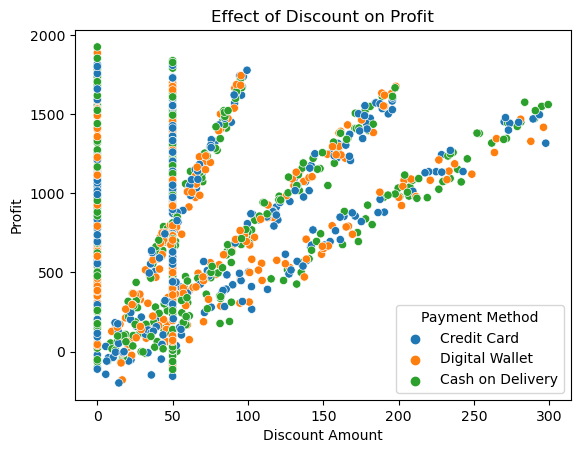

In [38]:
sns.scatterplot(x='Discount Amount', y='Profit', hue='Payment Method', data=df)
plt.title("Effect of Discount on Profit")
plt.xlabel("Discount Amount")
plt.ylabel("Profit")
plt.show()

## Insights & Correlation Analysis

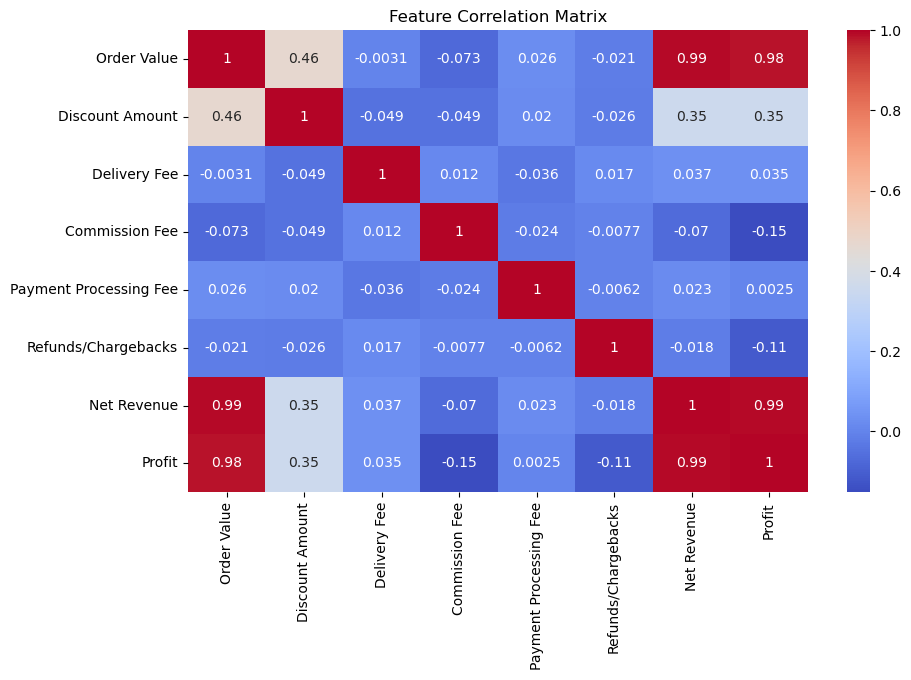

In [44]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation = df[['Order Value', 'Discount Amount', 'Delivery Fee', 'Commission Fee',
                  'Payment Processing Fee', 'Refunds/Chargebacks', 'Net Revenue', 'Profit']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

### Simple Linear Regression: Order Value vs Profit

In [48]:
from sklearn.linear_model import LinearRegression
X = df[['Order Value']]
y = df['Profit']

model = LinearRegression()
model.fit(X, y)
print(f"Estimated Model: Profit = {model.coef_[0]:.2f} * Order Value + {model.intercept_:.2f}")

Estimated Model: Profit = 0.95 * Order Value + -174.96


### Spend by New Customers

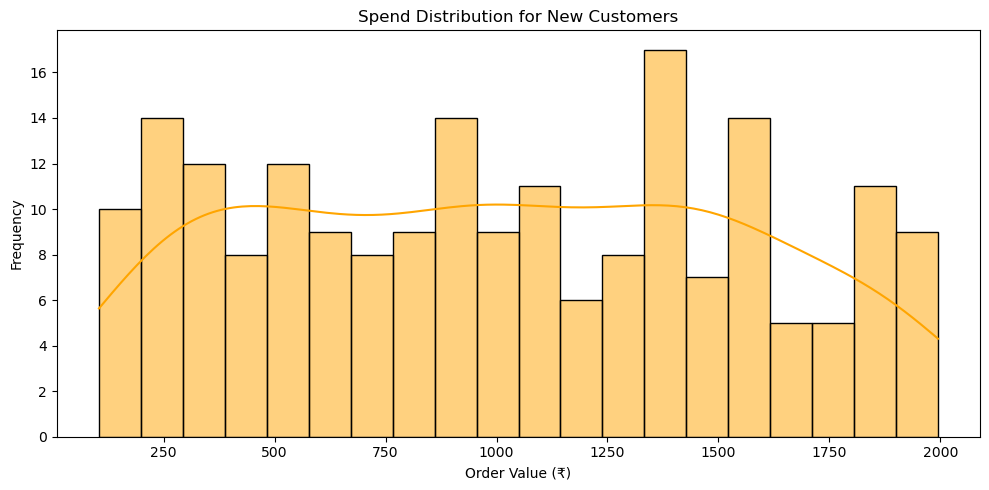

In [59]:
new_customers = df[df['Discounts and Offers'].str.contains("New User", na=False)]

# Total spend by new customers
plt.figure(figsize=(10, 5))
sns.histplot(new_customers['Order Value'], bins=20, kde=True, color='orange')
plt.title("Spend Distribution for New Customers")
plt.xlabel("Order Value (₹)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Summary metrics

In [51]:
summary_metrics = {
    "Total Orders": len(df),
    "Total Revenue (₹)": df['Net Revenue'].sum(),
    "Total Profit (₹)": df['Profit'].sum(),
    "Total Discounts Given (₹)": df['Discount Amount'].sum(),
    "Avg Order Value (₹)": df['Order Value'].mean(),
    "Avg Profit per Order (₹)": df['Profit'].mean(),
}

# Display
for key, value in summary_metrics.items():
    print(f"{key}: {value:,.2f}")

Total Orders: 1,000.00
Total Revenue (₹): 1,008,299.15
Total Profit (₹): 823,177.15
Total Discounts Given (₹): 74,289.85
Avg Order Value (₹): 1,053.97
Avg Profit per Order (₹): 823.18


## Numeric summary

In [66]:
print(" ** Numeric Summary:")
print(df[['Order Value', 'Discount Amount', 'Net Revenue', 'Total Cost', 'Profit']].describe())

# Categorical summaries
print("\n ** Payment Methods:")
print(df['Payment Method'].value_counts())

print("\n ** Top 5 Discounts Used:")
print(df['Discounts and Offers'].value_counts().head(5))

 ** Numeric Summary:
       Order Value  Discount Amount  Net Revenue   Total Cost       Profit
count  1000.000000      1000.000000  1000.000000  1000.000000  1000.000000
mean   1053.969000        74.289850  1008.299150   185.122000   823.177150
std     530.975339        68.688494   503.074288    66.236851   510.988801
min     104.000000         0.000000    85.000000    62.000000  -198.300000
25%     597.750000        26.837500   572.550000   134.000000   398.750000
50%    1038.500000        50.000000   996.500000   181.000000   805.500000
75%    1494.000000       101.100000  1409.625000   221.000000  1235.050000
max    1995.000000       299.250000  2016.000000   389.000000  1926.000000

 ** Payment Methods:
Payment Method
Cash on Delivery    357
Credit Card         337
Digital Wallet      306
Name: count, dtype: int64

 ** Top 5 Discounts Used:
Discounts and Offers
10%             233
50 off Promo    201
15% New User    198
5% on App       183
Name: count, dtype: int64


In [62]:
# Export enhanced data with calculations
df.to_csv("food_order_analysis_results.csv", index=False)
print("Results saved to 'food_order_analysis_results.csv'")

Results saved to 'food_order_analysis_results.csv'
